# Initially, developed a Novice Real-Time Accident Detection System: Engineered a comprehensive model integrating hardware components (Arduino, GPS, GSM, Accelerometer) with C programming, resulting in a system capable of detecting and alerting for vehicular accidents.

Currently, I am working on a similar concept using Python with dummy data. This involves understanding additional parameters and implementing visualization to test and validate the model, aiming to expand its functionality.

# Real-time data

###### The synthetic data is generated to simulate real-time conditions, mirroring how these components would behave in a live environment. Consequently, this project focuses on real-time data processing and analysis.

# Data Collection

The dataset contains vehicle telemetry and sensor data for various analytical and testing purposes. The dataset consists of 1000 data points, each representing a minute-by-minute snapshot of vehicle conditions and operations.

Key Features:
* Timestamp: Captures the date and time of each data entry, starting from January 1, 2024.
* Speed: Measures vehicle speed in km/h, ranging from 0 to 120 km/h.
* Acceleration: Records the vehicle’s acceleration and deceleration in m/s², from -10 to 10 m/s².
* Braking: Indicates whether the brakes were applied (1) or not (0).
* GPS Coordinates: Provides latitude and longitude values for vehicle location, ranging from 20.0 to 30.0 for latitude and 80.0 to 90.0 for longitude.
* Accident Indicator: Shows if an accident occurred (1) or not (0), with a 5% occurrence rate.
* Impact Sensor: Measures impact intensity, with values between 0 and 10.
* Odometer Reading: Simulates cumulative distance traveled using a cumulative sum of random increments.
* Fuel Level: Represents fuel percentage, ranging from 10% to 100%.
* Engine Temperature: Records the engine temperature in °C, between 70 and 110 °C.
* Gyroscope Data: Provides readings along the x, y, and z axes, ranging from -5 to 5.
* Camera Images: Includes placeholder filenames for images captured by the vehicle’s camera.
* Microphone Noise Level: Measures ambient noise level in dB, between 30 and 100 dB.
* Tire Pressure: Represents tire pressure in psi, ranging from 30 to 35 psi.

This dataset is designed for developing and testing algorithms related to vehicle monitoring, accident detection, and overall automotive analytics. It provides a comprehensive view of vehicle performance and environmental conditions, enabling detailed analysis and model development.

In [ ]:
import pandas as pd
import numpy as np

# Parameters
data_size = 1000  # Number of data points

# Generate dummy data
data = {
    'timestamp': pd.date_range(start='2024-01-01', periods=data_size, freq='T'),
    'speed': np.random.uniform(0, 120, size=data_size),
    'acceleration': np.random.uniform(-10, 10, size=data_size),
    'braking': np.random.choice([0, 1], size=data_size),
    'gps_latitude': np.random.uniform(20.0, 30.0, size=data_size),
    'gps_longitude': np.random.uniform(80.0, 90.0, size=data_size),
    'accident': np.random.choice([0, 1], size=data_size, p=[0.95, 0.05]),
    'impact_sensor': np.random.uniform(0, 10, size=data_size),  # Impact sensor data
    'odometer': np.cumsum(np.random.uniform(0, 2, size=data_size)),  # Cumulative distance
    'fuel_level': np.random.uniform(10, 100, size=data_size),  # Fuel level in percentage
    'engine_temp': np.random.uniform(70, 110, size=data_size),  # Engine temperature in °C
    'gyroscope_x': np.random.uniform(-5, 5, size=data_size),  # Gyroscope x-axis data
    'gyroscope_y': np.random.uniform(-5, 5, size=data_size),  # Gyroscope y-axis data
    'gyroscope_z': np.random.uniform(-5, 5, size=data_size),  # Gyroscope z-axis data
    'camera_image': [f'image_{i}.jpg' for i in range(data_size)],  # Placeholder image filenames
    'microphone_noise_level': np.random.uniform(30, 100, size=data_size),  # Noise level in dB
    'tire_pressure': np.random.uniform(30, 35, size=data_size)  # Tire pressure in psi
}

In [ ]:
# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("extended_datalog.csv", index=False)

In [ ]:
# Load the extended data
df = pd.read_csv("extended_datalog.csv")

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Summary statistics
print("Summary Statistics:")
print(df.describe(include='all'))

# Vehicle data analysis
print("\nSpeed Summary:")
print(df['speed'].describe())

print("\nAcceleration Summary:")
print(df['acceleration'].describe())

print("\nBraking Events:")
print(df['braking'].value_counts())

print("\nAccident Events:")
print(df['accident'].value_counts())

print("\nFuel Level Summary:")
print(df['fuel_level'].describe())

print("\nEngine Temperature Summary:")
print(df['engine_temp'].describe())

print("\nGyroscope Data Summary:")
print(df[['gyroscope_x', 'gyroscope_y', 'gyroscope_z']].describe())

print("\nTire Pressure Summary:")
print(df['tire_pressure'].describe())

# Camera Image Analysis (Placeholder)
print("\nCamera Image Filenames:")
print(df['camera_image'].head())

# Noise Level Analysis
print("\nMicrophone Noise Level Summary:")
print(df['microphone_noise_level'].describe())

# Timing Analysis (if timestamps are useful)
df['time_diff'] = df['timestamp'].diff().fillna(pd.Timedelta(seconds=0))
print("\nTime Differences Between Data Points:")
print(df[['timestamp', 'time_diff']].head())

# Impact Sensor Data Analysis
print("\nImpact Sensor Summary:")
print(df['impact_sensor'].describe())

# Odometer Data Analysis
print("\nOdometer Summary:")
print(df['odometer'].describe())

Summary Statistics:
                            timestamp        speed  acceleration      braking  \
count                            1000  1000.000000   1000.000000  1000.000000   
unique                            NaN          NaN           NaN          NaN   
top                               NaN          NaN           NaN          NaN   
freq                              NaN          NaN           NaN          NaN   
mean    2024-01-01 08:19:29.999999744    57.498697     -0.463819     0.518000   
min               2024-01-01 00:00:00     0.060291     -9.998715     0.000000   
25%               2024-01-01 04:09:45    29.350005     -5.365188     0.000000   
50%               2024-01-01 08:19:30    56.746248     -0.341167     1.000000   
75%               2024-01-01 12:29:15    86.662280      4.206934     1.000000   
max               2024-01-01 16:39:00   119.915884      9.997436     1.000000   
std                               NaN    34.216105      5.692606     0.499926   

       

# Implement Accident Detection

This processes a CSV file to detect accidents based on predefined thresholds for impact and acceleration. It flags records with significant impact or acceleration, or where an accident is already marked, and then filters and prints these accident events with details such as timestamp, speed, and GPS coordinates.

In [ ]:
#Summary statistics
print(df[['impact_sensor', 'acceleration', 'braking']].describe())

       impact_sensor  acceleration      braking
count    1000.000000   1000.000000  1000.000000
mean        4.944870     -0.463819     0.518000
std         2.821805      5.692606     0.499926
min         0.006799     -9.998715     0.000000
25%         2.564084     -5.365188     0.000000
50%         4.963796     -0.341167     1.000000
75%         7.293112      4.206934     1.000000
max         9.984063      9.997436     1.000000


In [ ]:
import pandas as pd
import numpy as np

# Load the extended data
df = pd.read_csv("extended_datalog.csv")

# Define thresholds for accident detection
impact_threshold = 7  # Example threshold for impact sensor
acceleration_threshold = 8  # Example threshold for acceleration

# Detect accidents
df['detected_accident'] = ((df['impact_sensor'] > impact_threshold) |
                            (df['acceleration'].abs() > acceleration_threshold) |
                            (df['accident'] == 1)).astype(int)

# Identify accident events
accidents = df[df['detected_accident'] == 1]

# Print detected accidents
print("\nDetected Accident Events:")
print(accidents[['timestamp', 'speed', 'acceleration', 'impact_sensor', 'gps_latitude', 'gps_longitude']])


Detected Accident Events:
               timestamp       speed  acceleration  impact_sensor  \
2    2024-01-01 00:02:00   89.488987     -9.914205       9.846858   
3    2024-01-01 00:03:00   17.857064     -9.839640       6.579339   
4    2024-01-01 00:04:00   50.178337      2.376822       1.681897   
5    2024-01-01 00:05:00   18.264659      8.025827       8.089017   
6    2024-01-01 00:06:00   25.795570      3.936515       8.974029   
..                   ...         ...           ...            ...   
990  2024-01-01 16:30:00   95.370049     -6.126393       7.009358   
992  2024-01-01 16:32:00   69.982156      9.301214       5.138529   
994  2024-01-01 16:34:00   82.558192      4.235289       8.142125   
997  2024-01-01 16:37:00  105.527236      1.240752       9.257580   
999  2024-01-01 16:39:00   90.836371     -8.750871       6.578771   

     gps_latitude  gps_longitude  
2       22.754126      81.838524  
3       28.081517      81.483281  
4       24.407666      81.154966  
5   

# Visualization and Monitoring

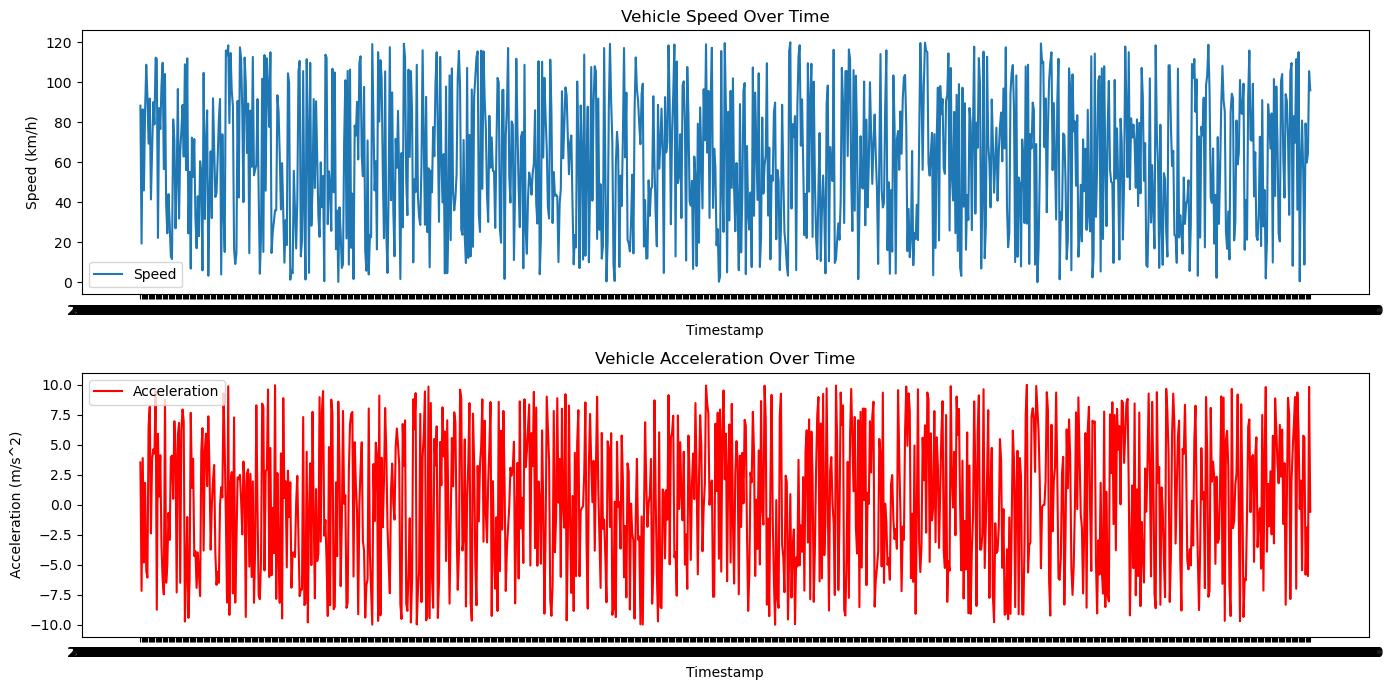

In [ ]:
import matplotlib.pyplot as plt

# Plotting speed and acceleration data
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(df['timestamp'], df['speed'], label='Speed')
plt.title('Vehicle Speed Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Speed (km/h)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df['timestamp'], df['acceleration'], label='Acceleration', color='r')
plt.title('Vehicle Acceleration Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()

plt.tight_layout()
plt.show()

This code builds upon previous blocks by refining the detection thresholds and enhancing the alert generation process. It consolidates the logic for detecting accidents and generating alerts into a streamlined process, ensuring accurate and clear reporting of potential accidents.

In [ ]:
import pandas as pd
import numpy as np

# Load the extended data
df = pd.read_csv("extended_datalog.csv")

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Define new thresholds for accident detection
impact_threshold = 7  # Adjusted threshold for impact sensor
acceleration_threshold = 5  # Adjusted threshold for acceleration
braking_threshold = 1  # Threshold for braking (binary values)

# Refined accident detection logic
df['detected_accident'] = (
    (df['impact_sensor'] > impact_threshold) |
    (df['acceleration'].abs() > acceleration_threshold) |
    (df['braking'] >= braking_threshold)
).astype(int)

# Generate alerts
def generate_alert(row):
    if row['detected_accident'] == 1:
        return f"Alert! Potential accident detected at {row['timestamp']}. Speed: {row['speed']}, Acceleration: {row['acceleration']}, Impact Sensor: {row['impact_sensor']}, GPS: ({row['gps_latitude']}, {row['gps_longitude']})"
    return None

df['alert'] = df.apply(generate_alert, axis=1)

# Filter rows with alerts
alerts = df.dropna(subset=['alert'])

# Print detected accident alerts
print("\nAccident Alerts:")
print(alerts[['timestamp', 'speed', 'acceleration', 'impact_sensor', 'gps_latitude', 'gps_longitude', 'alert']])


Accident Alerts:
              timestamp       speed  acceleration  impact_sensor  \
1   2024-01-01 00:01:00   73.390832      3.527843       4.966012   
2   2024-01-01 00:02:00   89.488987     -9.914205       9.846858   
3   2024-01-01 00:03:00   17.857064     -9.839640       6.579339   
5   2024-01-01 00:05:00   18.264659      8.025827       8.089017   
6   2024-01-01 00:06:00   25.795570      3.936515       8.974029   
..                  ...         ...           ...            ...   
994 2024-01-01 16:34:00   82.558192      4.235289       8.142125   
995 2024-01-01 16:35:00    8.254535     -6.859091       5.102614   
997 2024-01-01 16:37:00  105.527236      1.240752       9.257580   
998 2024-01-01 16:38:00   38.207494      7.228009       2.174473   
999 2024-01-01 16:39:00   90.836371     -8.750871       6.578771   

     gps_latitude  gps_longitude  \
1       28.639781      80.415070   
2       22.754126      81.838524   
3       28.081517      81.483281   
5       20.636734    

This code provides a visual summary of how often different values occur for the impact_sensor, acceleration, and braking variables in the dataset, helping to understand their distributions and patterns.

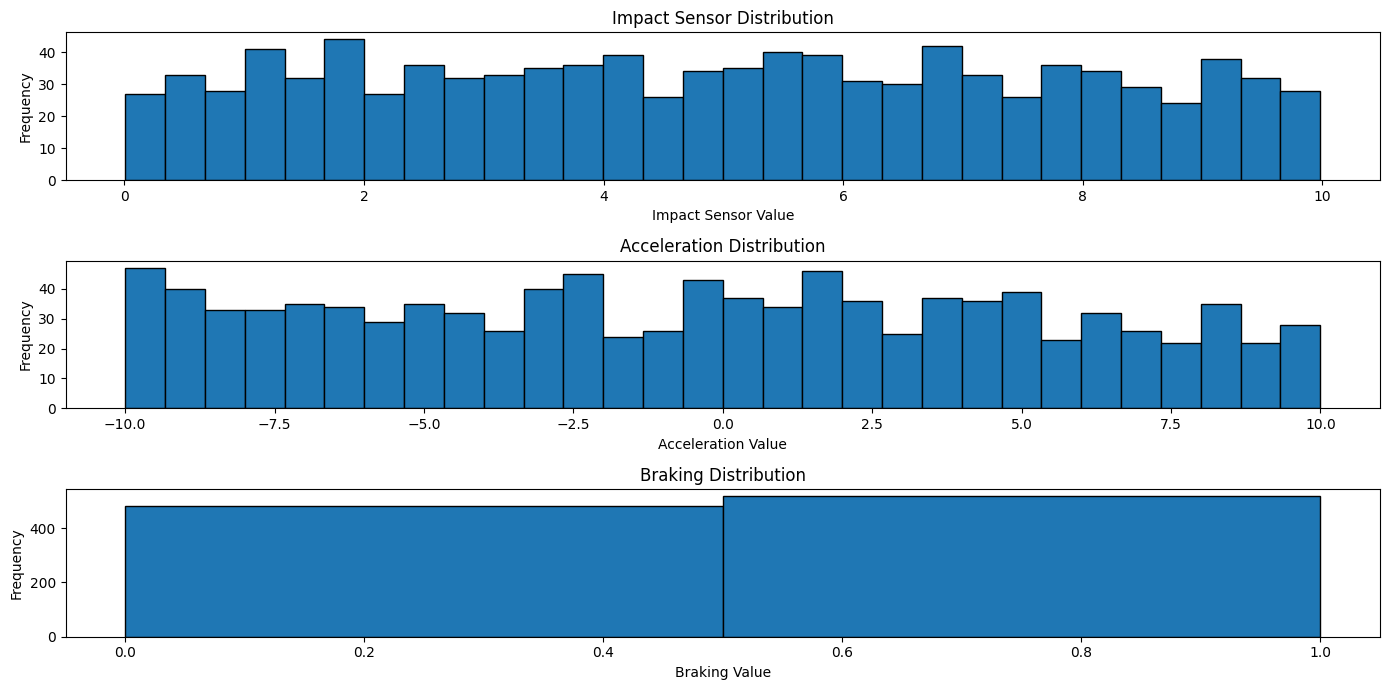

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
plt.hist(df['impact_sensor'], bins=30, edgecolor='k')
plt.title('Impact Sensor Distribution')
plt.xlabel('Impact Sensor Value')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.hist(df['acceleration'], bins=30, edgecolor='k')
plt.title('Acceleration Distribution')
plt.xlabel('Acceleration Value')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
plt.hist(df['braking'], bins=2, edgecolor='k')
plt.title('Braking Distribution')
plt.xlabel('Braking Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


This snippet identifies and flags instances of high impact, high acceleration, and significant braking in the dataset, and then prints out these flagged instances to help analyze specific conditions where alerts were triggered.

In [ ]:
# Test each condition separately
df['impact_alert'] = (df['impact_sensor'] > impact_threshold).astype(int)
df['acceleration_alert'] = (df['acceleration'].abs() > acceleration_threshold).astype(int)
df['braking_alert'] = (df['braking'] >= braking_threshold).astype(int)

# Check results
print("\nImpact Alerts:")
print(df[['timestamp', 'impact_sensor', 'impact_alert']].dropna(subset=['impact_alert']))

print("\nAcceleration Alerts:")
print(df[['timestamp', 'acceleration', 'acceleration_alert']].dropna(subset=['acceleration_alert']))

print("\nBraking Alerts:")
print(df[['timestamp', 'braking', 'braking_alert']].dropna(subset=['braking_alert']))



Impact Alerts:
              timestamp  impact_sensor  impact_alert
0   2024-01-01 00:00:00       1.447701             0
1   2024-01-01 00:01:00       4.966012             0
2   2024-01-01 00:02:00       9.846858             1
3   2024-01-01 00:03:00       6.579339             1
4   2024-01-01 00:04:00       1.681897             0
..                  ...            ...           ...
995 2024-01-01 16:35:00       5.102614             1
996 2024-01-01 16:36:00       4.021804             0
997 2024-01-01 16:37:00       9.257580             1
998 2024-01-01 16:38:00       2.174473             0
999 2024-01-01 16:39:00       6.578771             1

[1000 rows x 3 columns]

Acceleration Alerts:
              timestamp  acceleration  acceleration_alert
0   2024-01-01 00:00:00      1.821049                   0
1   2024-01-01 00:01:00      3.527843                   0
2   2024-01-01 00:02:00     -9.914205                   1
3   2024-01-01 00:03:00     -9.839640                   1
4   2024-01

This script processes vehicle data to identify and print alerts when any of the predefined thresholds are exceeded, potentially indicating an accident or near-accident scenario.

In [ ]:
import pandas as pd

# Load the extended data
df = pd.read_csv("extended_datalog.csv")

# Define thresholds for accident detection
impact_threshold = 7  # Example threshold for impact sensor
acceleration_threshold = 8  # Example threshold for acceleration
braking_threshold = 1  # Example threshold for braking

# Define function to check for alerts
def check_for_alert(row):
    if ((row['impact_sensor'] > impact_threshold) or
        (abs(row['acceleration']) > acceleration_threshold) or
        (row['braking'] >= braking_threshold)):
        return (f"Alert at {row['timestamp']}: High impact or acceleration detected. "
                f"Speed: {row['speed']}, Acceleration: {row['acceleration']}, "
                f"Impact Sensor: {row['impact_sensor']}, GPS: ({row['gps_latitude']}, {row['gps_longitude']})")
    return None

# Simulate real-time alert generation
for index, row in df.iterrows():
    alert = check_for_alert(row)
    if alert:
        print(alert)

Alert at 2024-01-01 00:01:00: High impact or acceleration detected. Speed: 73.39083245784059, Acceleration: 3.5278429566767078, Impact Sensor: 4.966011944830332, GPS: (28.63978067022323, 80.41507027211642)
Alert at 2024-01-01 00:02:00: High impact or acceleration detected. Speed: 89.48898720652593, Acceleration: -9.914205191415546, Impact Sensor: 9.846857634204278, GPS: (22.75412574332875, 81.83852366058308)
Alert at 2024-01-01 00:03:00: High impact or acceleration detected. Speed: 17.857063611542525, Acceleration: -9.839640211658407, Impact Sensor: 6.579339413205406, GPS: (28.081516684477897, 81.48328100243315)
Alert at 2024-01-01 00:05:00: High impact or acceleration detected. Speed: 18.26465938150889, Acceleration: 8.025827269050687, Impact Sensor: 8.089017116576956, GPS: (20.63673417877134, 80.63988983724782)
Alert at 2024-01-01 00:06:00: High impact or acceleration detected. Speed: 25.79556985967749, Acceleration: 3.9365146378846383, Impact Sensor: 8.974029032658324, GPS: (25.5811

# Future enhancements
Due to limited resources, we were unable to subscribe to services like Twilio, which facilitate real-time messaging, calls, and email interactions. Twilio is a cloud communications platform that offers APIs for integrating communication capabilities such as SMS, voice, video, and email into applications. It allows developers to programmatically send and receive messages, make phone calls, and even trigger alerts based on specific events or conditions.

In the future, incorporating Twilio into the project could significantly enhance the alert mechanism. By integrating Twilio's services, we could set up real-time notifications that are sent via SMS, email, or voice calls whenever an accident is detected or other critical conditions are met. This would enable a more responsive and immediate communication system, ensuring that alerts are delivered promptly to the appropriate contacts. Implementing and testing this component would greatly improve the overall effectiveness and reliability of the system in real-world scenarios.

Optional:

To integrate Twilio for real-time alerts in the project, we'll need to use the Twilio API to send SMS, voice calls, or emails.

Step 1:
pip install twilio

Step 2:
Set Up the Twilio Account - Obtain the Account SID, Auth Token and Twilio phone number

Step 3: Sending SMS Alerts with Twilio

To integrate Twilio into the project for sending SMS alerts, we can use the following Python script. We need to make sure that we have the `twilio` library installed, and we replace placeholders with our actual Twilio credentials and phone numbers.

```python
from twilio.rest import Client

# Your Twilio account SID and Auth Token
account_sid = 'your_account_sid_here'
auth_token = 'your_auth_token_here'

# Create a Twilio client
client = Client(account_sid, auth_token)

def send_sms_alert(to_phone_number, message_body):
    """
    Send an SMS alert via Twilio.

    :param to_phone_number: Recipient's phone number in E.164 format
    :param message_body: The message content to send
    """
    message = client.messages.create(
        body=message_body,
        from_='your_twilio_phone_number_here',
        to=to_phone_number
    )
    
    print(f"Message sent with SID: {message.sid}")

# Example usage
if __name__ == "__main__":
    recipient_phone = '+1234567890'  # Replace with the recipient's phone number
    alert_message = 'Alert: Potential accident detected. Please check the system for details.'
    send_sms_alert(recipient_phone, alert_message)
```

Step 4: Sending SMS Alerts with Twilio, integrating into our code

This Python script integrates Twilio to send SMS alerts based on specific conditions. We need to ensure that we have the `twilio` and `pandas` libraries installed and we replace placeholders with our actual Twilio credentials and phone numbers.

```python
# Import necessary modules
from twilio.rest import Client
import pandas as pd

# Twilio configuration
account_sid = 'your_account_sid_here'
auth_token = 'your_auth_token_here'
client = Client(account_sid, auth_token)
twilio_phone_number = 'your_twilio_phone_number_here'

def send_sms_alert(to_phone_number, message_body):
    """
    Send an SMS alert via Twilio.
    """
    message = client.messages.create(
        body=message_body,
        from_=twilio_phone_number,
        to=to_phone_number
    )
    print(f"Message sent with SID: {message.sid}")

# Load the data
df = pd.read_csv("extended_datalog.csv")

# Define thresholds
impact_threshold = 7
acceleration_threshold = 8
braking_threshold = 1

# Process data and send alerts
for index, row in df.iterrows():
    if (row['impact_sensor'] > impact_threshold or
        abs(row['acceleration']) > acceleration_threshold or
        row['braking'] >= braking_threshold):
        
        alert_message = (
            f"Alert! Potential accident detected at {row['timestamp']}. "
            f"Speed: {row['speed']}, Acceleration: {row['acceleration']}, "
            f"Impact Sensor: {row['impact_sensor']}, GPS: ({row['gps_latitude']}, {row['gps_longitude']})"
        )
        recipient_phone = '+1234567890'  # Replace with the recipient's phone number
        send_sms_alert(recipient_phone, alert_message)


